In [10]:
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
from firebase import db



In [ ]:
# Load both datasets into DataFrames

# FFNN dataset
ffnn_docs = db.collection("ffnn_dataset").stream()
ffnn_rows = [doc.to_dict() for doc in ffnn_docs]
df_ffnn   = pd.DataFrame(ffnn_rows)

# RNN dataset
rnn_docs  = db.collection("rnn_dataset").stream()
rnn_rows  = [doc.to_dict() for doc in rnn_docs]
df_rnn    = pd.DataFrame(rnn_rows)

print(f"Loaded {len(df_ffnn)} FFNN records, {len(df_rnn)} RNN records")


Loaded 4665 FFNN records, 4665 RNN records


In [11]:
# Show a heading
display(Markdown("### FFNN Dataset Sample"))

# Then just display the DataFrame
display(df_ffnn.sample(10))

### FFNN Dataset Sample

,gpt_score,tld_sg_1.0,tld_am_1.0,tld_io_0.0,tld_jp_0.0,tld_ca_0.0,tld_tv_0.0,tld_nl_0.0,tld_science_0.0,tld_ai_0.0,...,tld_sh_1.0,tld_io_1.0,tld_training_0.0,tld_ae_0.0,tld_ca_1.0,snippet_overlap,tld_edu_1.0,tld_gg_1.0,tld_sa_0.0,tld_nyc_1.0
487,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,2,False,False,True,False
2695,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,3,False,False,True,False
1992,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,2,False,False,True,False
1397,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,0,True,False,True,False
3192,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,1,False,False,True,False
2322,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,1,False,False,True,False
628,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,1,False,False,True,False
2010,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,0,False,False,True,False
3608,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,0,False,False,True,False
801,0,False,False,True,True,True,True,True,True,True,...,False,False,True,True,False,1,False,False,True,False


In [ ]:
# Load both datasets into DataFrames

# FFNN dataset
ffnn_docs = db.collection("ffnn_dataset").stream()
ffnn_rows = [doc.to_dict() for doc in ffnn_docs]
df_ffnn   = pd.DataFrame(ffnn_rows)

# RNN dataset
rnn_docs  = db.collection("rnn_dataset").stream()
rnn_rows  = [doc.to_dict() for doc in rnn_docs]
df_rnn    = pd.DataFrame(rnn_rows)

print(f"Loaded {len(df_ffnn)} FFNN records, {len(df_rnn)} RNN records")


Loaded 4665 FFNN records, 4665 RNN records


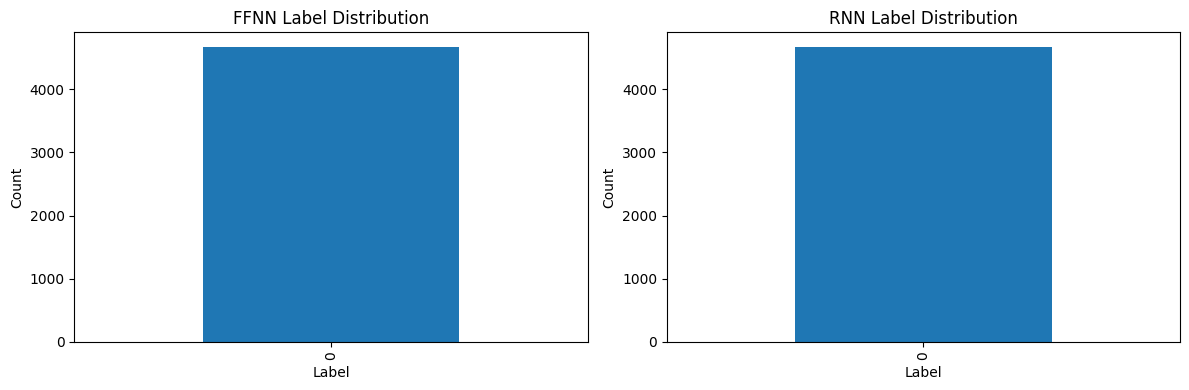

In [ ]:
# Plot label distributions side by side

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df_ffnn['label'].value_counts().sort_index() \
    .plot(kind='bar', ax=ax1, title='FFNN Label Distribution')
ax1.set_xlabel("Label")
ax1.set_ylabel("Count")

df_rnn['label'].value_counts().sort_index() \
    .plot(kind='bar', ax=ax2, title='RNN Label Distribution')
ax2.set_xlabel("Label")
ax2.set_ylabel("Count")

plt.tight_layout()
plt.show()


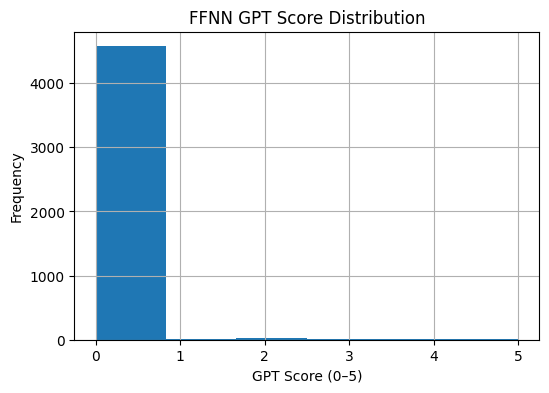

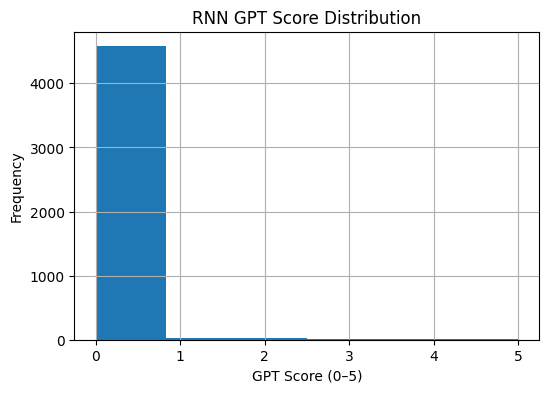

In [ ]:
# Plot GPT score distributions (if present)

for name, df in [("FFNN", df_ffnn), ("RNN", df_rnn)]:
    if 'gpt_score' in df.columns:
        plt.figure(figsize=(6,4))
        df['gpt_score'].hist(bins=6)
        plt.title(f"{name} GPT Score Distribution")
        plt.xlabel("GPT Score (0–5)")
        plt.ylabel("Frequency")
        plt.show()


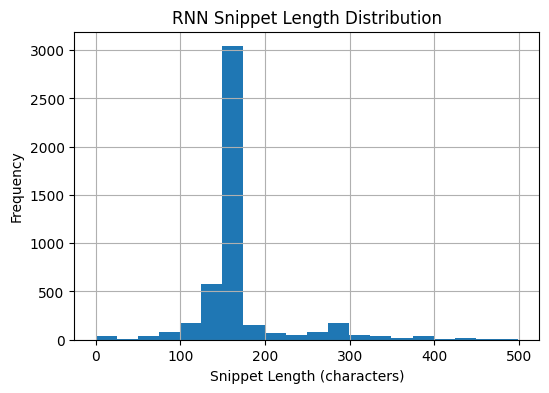

In [ ]:
# Analyze text length in RNN dataset

# snippet length
df_rnn['snippet_len'] = df_rnn['snippet'].str.len()

plt.figure(figsize=(6,4))
df_rnn['snippet_len'].hist(bins=20)
plt.title("RNN Snippet Length Distribution")
plt.xlabel("Snippet Length (characters)")
plt.ylabel("Frequency")
plt.show()


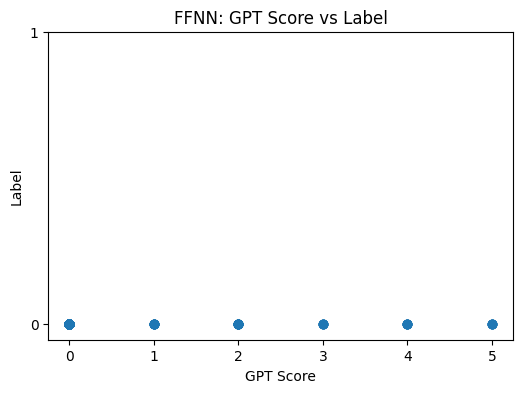

In [ ]:
# GPT Score vs. Label scatter (FFNN)

if 'gpt_score' in df_ffnn.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df_ffnn['gpt_score'], df_ffnn['label'], alpha=0.5)
    plt.title("FFNN: GPT Score vs Label")
    plt.xlabel("GPT Score")
    plt.ylabel("Label")
    plt.yticks([0,1])
    plt.show()
